In [1]:
#automatically plot any two variables within certain limits
    # for example, compare run time to 

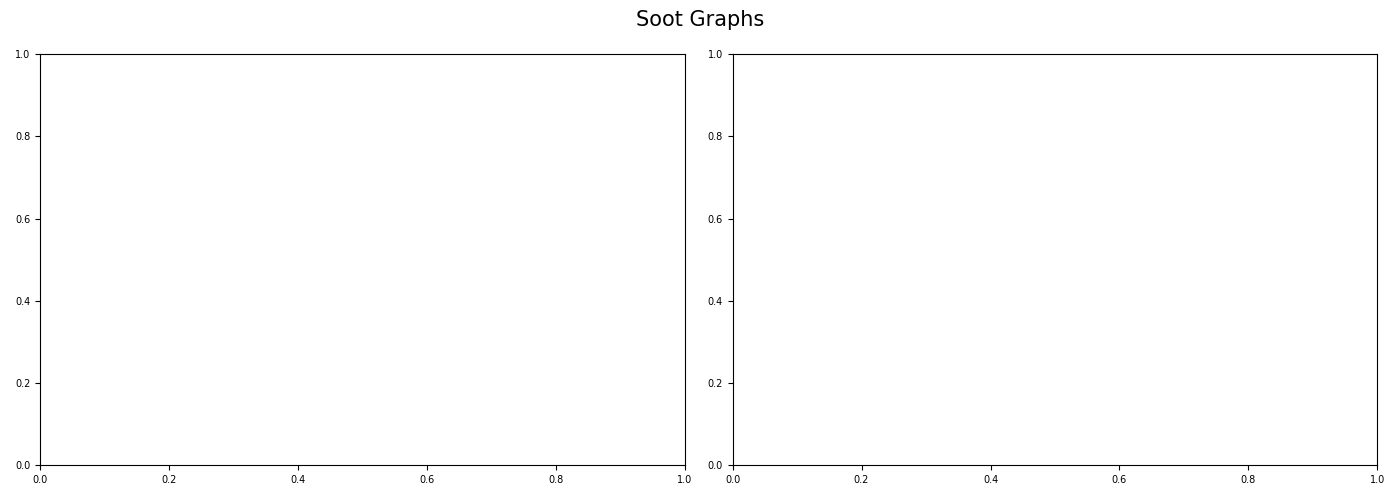

In [5]:
%matplotlib ipympl
import ipywidgets, asyncio, time
import glob
from scipy.signal import savgol_filter
import pandas as pd
# from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as mplstyle
from matplotlib.offsetbox import AnchoredText
mpl.rcParams['path.simplify_threshold'] = 1.0
mplstyle.use('fast')


dfPulseFiles =pd.DataFrame(columns =  ["type", "date", "time","df_runtime", "pulse_duration", "starting_sample_temp", "starting_ewm", "peak", "air_setpoint", "propane_setpoint","sampling_flow"])
dfFlushFiles =pd.DataFrame(columns =  ["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint","sampling_flow"])

def addFileToDF(fileName,df1,df2):
    fileName = fileName.replace('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ','',1)
    fileName = fileName.replace('.pkl','',1)    
    items = fileName.split(' ')
    data = []
    for item in items:
        try:
            data.append(float(item))
        except ValueError:
            data.append(item)
            
    if len(data) == 10:
        data.append(50)
    
    if data[0] == "Pulse" and (data[7] not in df1.values or data[6] not in df1.values):
        global dfPulseFiles
        dfPulseFiles = pd.concat([dfPulseFiles, pd.DataFrame([data], columns = ["type", "date", "time","df_runtime", "pulse_duration", "starting_sample_temp", "starting_ewm", "peak", "air_setpoint", "propane_setpoint", "sampling_flow"]) ],ignore_index=True)
    elif data[0] == "Flush" and (data[7] not in df2.values and data[6] not in df2.values):
        global dfFlushFiles
        dfFlushFiles = pd.concat([dfFlushFiles, pd.DataFrame([data], columns = ["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint", "sampling_flow"]) ],ignore_index=True)
        
def pulseToFilePath(series):
    try:
        val =  f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["pulse_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["peak"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])} {str(series["sampling_flow"])}.pkl'
        pd.read_pickle(val)
    except OSError as e:
        val =  f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["pulse_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["peak"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])}.pkl'
    return val

def flushToFilePath(series):
    try:
        val =  f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["flush_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["low"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])}  {str(series["sampling_flow"])}.pkl'
        pd.read_pickle(val)
    except OSError as e:
        return f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["flush_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["low"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])}.pkl'
            
def getDF(filePath):
    return pd.read_pickle(filePath)

files = glob.glob("C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\*.pkl")
for file in files:
     addFileToDF(file,dfPulseFiles,dfFlushFiles)
# dfFiles
#{dt_string} {df_runtime} {pulse_duration} {starting_sample_temp} {starting_ewm} {peak} {air_setpoint} {propane_setpoint}

itemLayout = ipywidgets.Layout(height = "auto",width="13.7%")
numberStyle = {'description_width': "50%"}

def colLayout(wid):
    return ipywidgets.Layout(display = "flex",flex_flow='column',border = '0px solid black',align_items = "stretch",justify_content="flex-start",width = wid)

def rowLayout(h):
    return ipywidgets.Layout(display = "flex",flex_flow='row',border = '1px solid black',align_items = "stretch",justify_content="flex-start",height = h,width = "70%")

running = ipywidgets.ToggleButton(description="Get DataFrames", icon="play",button_style = 'danger', layout = itemLayout)
text = ipywidgets.Textarea( layout = itemLayout, value = "status: ")
dataType = ipywidgets.ToggleButtons(options = ['Pulse','Flush'], layout ={'width':'18%'}, description = "data type: ")
xlim = ipywidgets.IntSlider(description="xlim", value=300, min=10, max=1500)
setx = ipywidgets.IntSlider(description="move x", value=0, min=0, max=1500)
slids = ipywidgets.VBox(children = [setx,xlim],layout = {"width":"30%"})

next1 = ipywidgets.Button(description="Next Plot 1", icon="play",layout = {"width":"93%"})
next2 = ipywidgets.Button(description="Next Plot 2", icon="play",layout = {"width":"93%"})
nextButtons = ipywidgets.VBox(children = [next1,next2],layout = colLayout("10%"))
back1 = ipywidgets.Button(description="Back 1", icon="play",layout = {"width":"93%"})
back2 = ipywidgets.Button(description="Back 2", icon="play",layout = {"width":"93%"})
backButtons = ipywidgets.VBox(children = [back1,back2],layout = colLayout("10%"))

maxPulse = ipywidgets.FloatText(description = "pulse time max",value = 5,step = 0.05, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minPulse = ipywidgets.FloatText(description = "pulse time min",value = 0.5,step = 0.05, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
pulseDuration = ipywidgets.HBox(children = [minPulse,maxPulse],description = "pulse duration",layout = colLayout("auto"))

maxFlush = ipywidgets.FloatText(description = "flush time max",value = 1000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minFlush = ipywidgets.FloatText(description = "flush time min",value = 5, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
flushDuration =  ipywidgets.HBox(children = [minFlush,maxFlush],description = "flush duration",layout = colLayout("auto"))

#"df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint"])
maxTime = ipywidgets.FloatText(description = "run time max",value = 500000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minTime = ipywidgets.FloatText(description = "run time min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
runTime =  ipywidgets.HBox(children = [minTime,maxTime],description = "run time",layout = colLayout("auto"))

maxTemp = ipywidgets.FloatText(description = "sample temp max",value = 35, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minTemp = ipywidgets.FloatText(description = "sample temp min",value = 25, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
temp =  ipywidgets.HBox(children = [minTemp,maxTemp],description = "flush duration",layout = colLayout("auto"))

maxStartEwm = ipywidgets.FloatText(description = "starting bcc max",value = 100000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minStartEwm = ipywidgets.FloatText(description = "starting bcc min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
startEwm =  ipywidgets.HBox(children = [minStartEwm,maxStartEwm],description = "flush duration",layout = colLayout("auto"))

maxAirSetpoint = ipywidgets.FloatText(description = "air max",value = 12, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minAirSetpoint = ipywidgets.FloatText(description = "air min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
airSetpoint =  ipywidgets.HBox(children = [minAirSetpoint,maxAirSetpoint],description = "flush duration",layout = colLayout("auto"))

maxPropaneSetpoint = ipywidgets.FloatText(description = "propane max",value = 0.1, step = 0.01,layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minPropaneSetpoint = ipywidgets.FloatText(description = "propane min",value = 0.00, step = 0.01, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
propaneSetpoint =  ipywidgets.HBox(children = [minPropaneSetpoint,maxPropaneSetpoint],description = "flush duration",layout = colLayout("auto"))

duration1 = ipywidgets.FloatText(layout = itemLayout,style = numberStyle)
endBcc1 = ipywidgets.FloatText(description = "end bcc", layout = itemLayout,style = numberStyle)
runTime1 = ipywidgets.FloatText(description = "run time", layout = itemLayout,style = numberStyle)
sampleTemp1 = ipywidgets.FloatText(description = "sample temp", layout = itemLayout,style = numberStyle)
startBcc1 = ipywidgets.FloatText(description = "starting bcc",layout = itemLayout,style = numberStyle)
airSetpoint1 = ipywidgets.FloatText(description = "air setpoint", layout = itemLayout,style = numberStyle)
propaneSetpoint1 = ipywidgets.FloatText(description = "propane setpoint", layout = itemLayout,style = numberStyle)

duration2 = ipywidgets.FloatText(layout = itemLayout,style = numberStyle)
endBcc2 = ipywidgets.FloatText(description = "end bcc", layout = itemLayout,style = numberStyle)
runTime2 = ipywidgets.FloatText(description = "run time", layout = itemLayout,style = numberStyle)
sampleTemp2 = ipywidgets.FloatText(description = "sample temp", layout = itemLayout,style = numberStyle)
startBcc2 = ipywidgets.FloatText(description = "starting bcc",layout = itemLayout,style = numberStyle)
airSetpoint2 = ipywidgets.FloatText(description = "air setpoint", layout = itemLayout,style = numberStyle)
propaneSetpoint2 = ipywidgets.FloatText(description = "propane setpoint", layout = itemLayout,style = numberStyle)

showBcc = ipywidgets.Checkbox(value = False, description = "Show Bcc", layout = itemLayout,indent = False)
showSavgol = ipywidgets.Checkbox(value = True, description = "Show Savgol", layout = itemLayout,indent = False)
showEWM = ipywidgets.Checkbox(value = True, description = "Show EWM", layout = itemLayout,indent = False)
showMax = ipywidgets.Checkbox(value = True, description = "Show max", layout = itemLayout,indent = False)
showMin = ipywidgets.Checkbox(value = True, description = "Show min", layout = itemLayout,indent = False)

misc = ipywidgets.HBox(children = [running,backButtons,nextButtons,text,dataType,slids], layout = rowLayout("10%"))
filters = ipywidgets.HBox(children=[pulseDuration,flushDuration,runTime,temp,startEwm,airSetpoint,propaneSetpoint],layout = rowLayout("10%"))
values1 =  ipywidgets.HBox(children=[duration1,endBcc1,runTime1,sampleTemp1,startBcc1,airSetpoint1,propaneSetpoint1],layout = rowLayout("10%"))
values2 =  ipywidgets.HBox(children=[duration2,endBcc2,runTime2,sampleTemp2,startBcc2,airSetpoint2,propaneSetpoint2],layout = rowLayout("10%"))
checks =  ipywidgets.HBox(children=[showBcc,showEWM,showSavgol,showMax,showMin],layout = rowLayout("10%"))
ui = ipywidgets.VBox(children = [misc,filters,values1,values2,checks],layout = colLayout("100%"))

tasks = dict()

paths = []
plotNum1 = 0
plotNum2 = 1

def changeNext1(x):
    global plotNum1
    plotNum1 = plotNum1 + 1
    
def changeNext2(x):
    global plotNum2
    plotNum2 = plotNum2 + 1
    
def changeBack1(x):
    global plotNum1
    plotNum1 = plotNum1 - 1
    
def changeBack2(x):
    global plotNum2
    plotNum2 = plotNum2 - 1

async def find_data(t):
    files = glob.glob("C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\*.pkl")
    for file in files:
        addFileToDF(file,dfPulseFiles,dfFlushFiles)
    text.value = ("status: filtering data")
    #files.
        #do things
    if dataType.value == "Pulse":
        dfMatchingFiles = dfPulseFiles.loc[
            (dfPulseFiles["pulse_duration"] >= minPulse.value) & (dfPulseFiles["pulse_duration"] <= maxPulse.value) &
            (dfPulseFiles["df_runtime"] <= maxTime.value) & (dfPulseFiles["df_runtime"] >= minTime.value) &
            (dfPulseFiles["starting_sample_temp"] <= maxTemp.value) &(dfPulseFiles["starting_sample_temp"] >= minTemp.value) &
            (dfPulseFiles["starting_ewm"] <= maxStartEwm.value) & (dfPulseFiles["starting_ewm"] >= minStartEwm.value) &
            (dfPulseFiles["air_setpoint"] <= maxAirSetpoint.value) & (dfPulseFiles["air_setpoint"] >= minAirSetpoint.value) &
            (dfPulseFiles["propane_setpoint"] <= maxPropaneSetpoint.value) & (dfPulseFiles["propane_setpoint"] >= minPropaneSetpoint.value)
        ]
        for index,row in dfMatchingFiles.iterrows():
            paths.append(pulseToFilePath(row))
            
    elif dataType.value == "Flush":
        #["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint"]
        dfMatchingFiles = dfFlushFiles.loc[
            (dfFlushFiles["flush_duration"] >= minFlush.value) & (dfFlushFiles["flush_duration"] <= maxFlush.value) &
            (dfFlushFiles["df_runtime"] <= maxTime.value) & (dfFlushFiles["df_runtime"] >= minTime.value) &
            (dfFlushFiles["starting_sample_temp"] <= maxTemp.value) &(dfFlushFiles["starting_sample_temp"] >= minTemp.value) &
            (dfFlushFiles["starting_ewm"] <= maxStartEwm.value) & (dfFlushFiles["starting_ewm"] >= minStartEwm.value) &
            (dfFlushFiles["air_setpoint"] <= maxAirSetpoint.value) & (dfFlushFiles["air_setpoint"] >= minAirSetpoint.value) &
            (dfFlushFiles["propane_setpoint"] <= maxPropaneSetpoint.value) & (dfFlushFiles["propane_setpoint"] >= minPropaneSetpoint.value)
        ]
        for index,row in dfMatchingFiles.iterrows():
            paths.append(flushToFilePath(row))
            
async def graph(t,a,b):    
    if a >= len(paths):
        global plotNum1
        plotNum1 = plotNum1 - len(paths)
    
    if b >= len(paths):
        global plotNum2
        plotNum2 = plotNum2 - len(paths)
    
    try:
        df1 = getDF(paths[plotNum1])
        df2 = getDF(paths[plotNum2])
        text.value = f"{str(len(paths))} dataframes fit the filter"
    except IndexError:
        text.value = "no data frames fit the profile"
    
    #update plots
    ax1.clear()
    ax2.clear()
    ax1.set_xlim([df1.shape[0] - (xlim.value+setx.value),df1.shape[0]-setx.value])
    ax2.set_xlim([df2.shape[0] - (xlim.value+setx.value),df2.shape[0]-setx.value])
    ax1.grid()
    ax2.grid()
    
    ax1.set_title(f"plot {plotNum1}",loc='left')
    ax2.set_title(f"plot {plotNum2}",loc='left')
    
    indexMin1 = df1['bcc ewm'].idxmin()
    Min1 = round(df1['bcc ewm'].min(),2)
    indexMin2 = df2['bcc ewm'].idxmin()
    Min2 = round(df2['bcc ewm'].min(),2)
    indexMax1 = df1['bcc ewm'].idxmax()
    Max1 = round(df1['bcc ewm'].max(),2)
    indexMax2 = df2['bcc ewm'].idxmax()
    Max2 = round(df2['bcc ewm'].max(),2)
    MM =[Min1,Min2,Max1,Max2]    
        
    if showBcc.value: 
        ax1.plot(df1["ir bcc"], label = "IR BCC", color = "black")
        ax2.plot(df2["ir bcc"], label = "IR BCC", color = "black")
        showMax.value = False
        showMin.value = False
    if showEWM.value: 
        ax1.plot(df1["bcc ewm"], label = "Bcc EWM", color = "blue")
        ax2.plot(df2["bcc ewm"], label = "Bcc EWM", color = "blue")
    if showMax.value:
        ax1.annotate(' ',xy = (indexMax1,Max1+(max(MM)-min(MM))*0.06), arrowprops = dict(facecolor = 'green',shrink = 0.05),)
        ax2.annotate(' ',xy = (indexMax2,Max2+(max(MM)-min(MM))*0.06), arrowprops = dict(facecolor = 'green',shrink = 0.05),)
    if showMin.value:
        ax1.annotate(text = ' ',xy = (indexMin1,Min1), arrowprops = dict(facecolor = 'red',shrink = 0.05),)
        ax2.annotate(text = ' ',xy = (indexMin2,Min2), arrowprops = dict(facecolor = 'red',shrink = 0.05),)
    if showSavgol.value:
        ax1.plot(savgol_filter(df1["bcc ewm"].to_numpy(), 50, 4),label = "bc1 savgol",color = "cyan")
        ax2.plot(savgol_filter(df2["bcc ewm"].to_numpy(), 50, 4),label = "bcc savgol",color = "cyan")
        
        
    ax1.add_artist(AnchoredText( f'Min: {Min1}, Max: {Max1}',loc = 'upper right'))
    ax2.add_artist(AnchoredText( f'Min: {Min2}, Max: {Max2}',loc = 'upper right'))
    
    ax1.set_ylim(min(MM)-200,max(MM)*1.1)
    ax2.set_ylim(min(MM)-200,max(MM)*1.1)
    
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper left")
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    #update values
    #[,runTime1,sampleTemp1,]
    
    
    duration1.description = paths[0].split(' ')[4] + " duration"
    duration2.description = paths[0].split(' ')[4] + " duration"
    duration1.value = float(paths[plotNum1].split(' ')[8])
    duration2.value = float(paths[plotNum2].split(' ')[8])
    startBcc1.value = float(paths[plotNum1].split(' ')[10])
    startBcc2.value = float(paths[plotNum2].split(' ')[10])
    endBcc1.value = df1.at[df1.shape[0]-1,"bcc ewm"]
    endBcc2.value = df2.at[df2.shape[0]-1,"bcc ewm"]
    runTime1.value = float(paths[plotNum1].split(' ')[7])
    runTime2.value = float(paths[plotNum2].split(' ')[7])
    sampleTemp1.value = float(paths[plotNum1].split(' ')[9])
    sampleTemp2.value = float(paths[plotNum2].split(' ')[9])
    propaneSetpoint1.value = float(paths[plotNum1].split(' ')[13].replace('.pkl','',1))
    propaneSetpoint2.value = float(paths[plotNum2].split(' ')[13].replace('.pkl','',1))
    airSetpoint1.value = float(paths[plotNum1].split(' ')[12])
    airSetpoint2.value = float(paths[plotNum2].split(' ')[12])
    
async def do_loop():
    t = 0
    paths.clear()
    asyncio.get_event_loop().create_task(find_data(t))
    while running.value:  
        asyncio.get_event_loop().create_task(graph(t,plotNum1,plotNum2))
        t += 1
        await asyncio.sleep(0.5)

def on_running_changed(*change):
    task = tasks.pop("do_loop", None)
    text.value = f"maybe stopping {task}..."
   
    if task:
        text.value = f"status: stopping {task}..."
        task.cancel()

    if running.value:
        text.value = "status: starting..."
        tasks["do_loop"] = asyncio.get_event_loop().create_task(do_loop())

        
#customize plot font sizes
plt.rc('axes',titlesize=10)
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
plt.rc('legend',fontsize = 8)
plt.rc('figure',titlesize = 15)
plt.rcParams['lines.linewidth'] = 1

#create "mosaic" customizing grid layout. Semicolons separate rows
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(14,5)
fig.suptitle("Soot Graphs")
plt.tight_layout()
plt.subplots_adjust(hspace = 0.2)
plt.ion()
fig.canvas.draw()

next1.on_click(changeNext1)
next2.on_click(changeNext2)
back1.on_click(changeBack1)
back2.on_click(changeBack2)
running.observe(on_running_changed, "value")
ui

[8200, 8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400]
R² = 0.9922584982682586
Y = 38019.05495353881 * e^(-0.001166285514452584 * x)


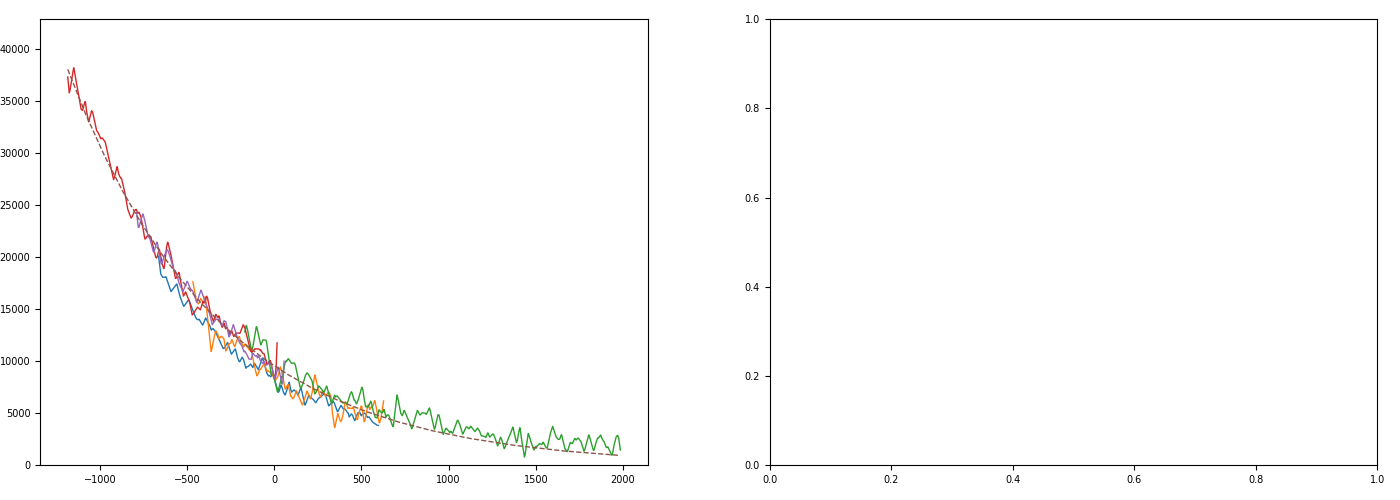

In [9]:
#plot all flush chambers

%matplotlib ipympl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import scipy.optimize
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

fig2,(ax3, ax4) = plt.subplots(1,2)
fig2.set_size_inches(14,5)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.2,wspace = 0.2)
plt.ion()
fig2.canvas.draw()

def commonValue(bccAll):
    vals = []
    for arr in bccAll:
        yhat = savgol_filter(arr, 70, 4)
        twoHundreds = []
        for i in yhat:
            x = int(i/200)*200
            if x not in twoHundreds:
                twoHundreds.append(x)
        vals.append(twoHundreds)
        
    #find common value
    s = None
    for lista in vals:
        if not s:
            s = set(lista)
        else:
            s &= set(lista)
    listS = list(s)
    listS.sort()
    print(listS)
    return(listS)

def plotFlushSamePlot():
    maxval = 0
    bccAll = []
    for i in range(len(paths)):
        bccAll.append(getDF(paths[i])["bcc ewm"].to_numpy())
        if max(bccAll[i]) > maxval: maxval = max(bccAll[i])
    plots = []
    
    commonval = commonValue(bccAll)[0]
    
    for bccvals in bccAll:
        yhat = savgol_filter(bccvals, 70, 4)
        commonIndex = np.where((yhat >= commonval - 150) & (yhat <= commonval + 150) )[0][0]
        x = list(range(-commonIndex, -commonIndex+len(yhat)))
            
        #plt.plot(bccvals)
        ax3.plot(x,yhat)
        plots.append([x,yhat])
        
    ax3.set_ylim([0,maxval+4000])
    flushLineBestFit(plots)

def monoExp(x, m, t):
    return m * np.exp(-t * x)

def fit(xs,ys,p0):
    xs = np.array(xs)
    startx = int(xs[0])
    xs = xs-startx
    
    # perform the fit
    params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
    m, t = params

    # determine quality of the fit
    squaredDiffs = np.square(ys - monoExp(xs, m, t))
    squaredDiffsFromMean = np.square(ys - np.mean(ys))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    print(f"R² = {rSquared}")

    # plot the results
    ax3.plot(xs+startx, monoExp(xs, m, t), '--', label="fitted")
    
    # inspect the parameters
    print(f"Y = {m} * e^(-{t} * x)")
    
def extrapolate():
    pass
        
def flushLineBestFit(flushPlots):
    df = pd.DataFrame(columns = ["x","y"])
    for pair in flushPlots:
        data = {"x":pair[0],"y":pair[1]}
        newdf = pd.DataFrame(data)
        newdf.set_index('x',inplace = True)
        df = pd.concat([df,newdf],axis = 1)
    df_means = df.mean(axis = 1)
    #df_means.index.tolist()
    vals = []
    vals = np.polyfit(df_means.index.tolist(), df_means.tolist(),2)
    fit(df_means.index.tolist(), df_means.tolist(), (40000,0.01))
                             
def getPeaks(yhat):
    #find initial peaks
    peaks,t = find_peaks(yhat[:220], distance=60)
    realPeaks = []
            
    #sort out peaks from before the pulse
    ipeaks = []
    for i in range(len(peaks)):
        if peaks[i] > 120 and peaks[i] < 220:
            ipeaks.append(peaks[i])
        if len(ipeaks) > 1:
            if yhat[ipeaks[0]] > yhat[ipeaks[1]]:
                del ipeaks[1]
            else:
                    del ipeaks[0]
    return(ipeaks)
                             
def plotPulseSamePlot():
    dis = []
    slopes = []
    colors = ["red","orange","green","blue","purple","magenta","grey","black","brown"]
    for path in range(len(paths)):
        bccvals = getDF(paths[path])["bcc ewm"].to_numpy()
        if len(bccvals) >= 400:
            yhat = savgol_filter(bccvals, 70, 3)

            #have them all start at the same y 
            #starty = yhat[0]
            minima = argrelextrema(yhat[0:130], np.less)
            minimay = yhat[0:130][argrelextrema(yhat[0:130], np.less)]
            for i in range(len(yhat)):
                yhat[i] = yhat[i] - minimay[-1]
                bccvals[i] = bccvals[i] -  minimay[-1]
            
            peaks = getPeaks(yhat)
            ax3.plot(peaks[0], yhat[peaks[0]], "o",color ="blue")
            
            #plot line of best fit for beginning
            xfit = list(range(130))
            m,b = np.polyfit(xfit,yhat[:130],1)
            yfit = list((val*m+b) for val in xfit)
            #ax3.plot(xfit,yfit,color = colors[path%len(colors)])
            
            #find and plot minima
            minima = argrelextrema(yhat[0:130], np.less)
            minimay = yhat[0:130][argrelextrema(yhat[0:130], np.less)]
            ax3.plot(minima[0][-1],minimay[-1],'o',color = 'red')
            
            #calculate average jump
            dis.append(yhat[peaks[0]] - minimay[-1])
            slopes.append(m)
            #plt.plot(bccvals)
            ax3.plot(yhat,color = colors[path%len(colors)])
            
    print(np.mean(dis))
    ax4.scatter(slopes,dis)
    ax4.set_xlabel('previous slope')
    ax4.set_ylabel('pulse jump bcc')
    
fig2.canvas.draw()
plotFlushSamePlot()
#plotPulseSamePlot()

In [6]:
files

['C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 01-07-2022 15-03-43 580.78 149.9 28.95 16694.92 13280.374 14.1585 0.07.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 06-07-2022 13-51-59 1259.08 17.95 32.49 19378.32 18150.516 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 06-07-2022 14-13-01 2521.11 1261.04 32.49 19311.24 2980.23416 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 30-06-2022 11-52-55 1047.42 242.93 28.57 30822.17 15743.69218 0.0 0.07.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 30-06-2022 12-46-17 4249.46 433.01 29.31 5860.82 2944.03936 0.0 0.07.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 30-06-2022 13-13-15 5867.6 1095.03 29.52 16988.09 2187.45571 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 30-06-2022 14-06-16 9048.47 2155.99 29.84 1

<class 'numpy.ndarray'>
R² = 0.999107330342064
Y = 2666.4986080972917 * e^(-0.3323976117739084 * x) + 42.49420762734821


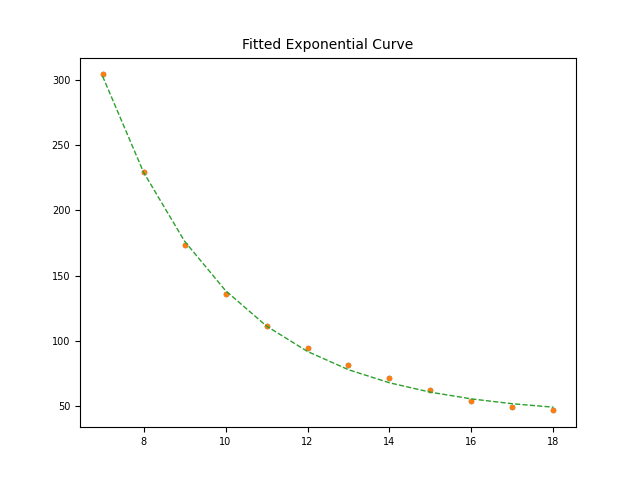

In [12]:
%matplotlib ipympl
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

xs = np.arange(12) + 7
ys = np.array([304.08994, 229.13878, 173.71886, 135.75499,
               111.096794, 94.25109, 81.55578, 71.30187, 
               62.146603, 54.212032, 49.20715, 46.765743])
print(type(xs))
plt.plot(xs, ys, '.')
plt.title("Original Data")


def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

def fit(xs,ys,p0):
    # perform the fit
    params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
    m, t, b = params
    sampleRate = 20_000 # Hz
    tauSec = (1 / t) / sampleRate

    # determine quality of the fit
    squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
    squaredDiffsFromMean = np.square(ys - np.mean(ys))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    print(f"R² = {rSquared}")

    # plot the results
    plt.plot(xs, ys, '.', label="data")
    plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
    plt.title("Fitted Exponential Curve")

    # inspect the parameters
    print(f"Y = {m} * e^(-{t} * x) + {b}")
    
fit(xs,ys,(2000,0.1,30))